Missing values in key columns:
 Average Heart Rate (bpm)     0
Max. Heart Rate (bpm).1      0
Average Speed                0
Max. Speed                  59
Elevation Gain (Raw)         0
Elevation Loss (Raw)         0
Distance (Raw)               0
Calories                     2
dtype: int64


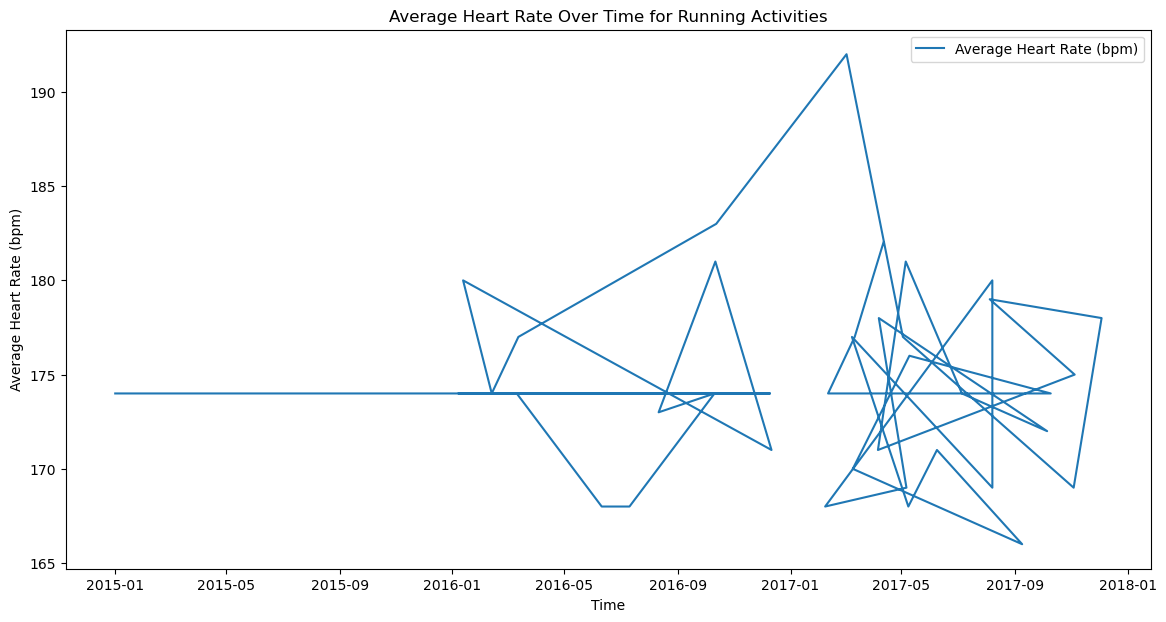

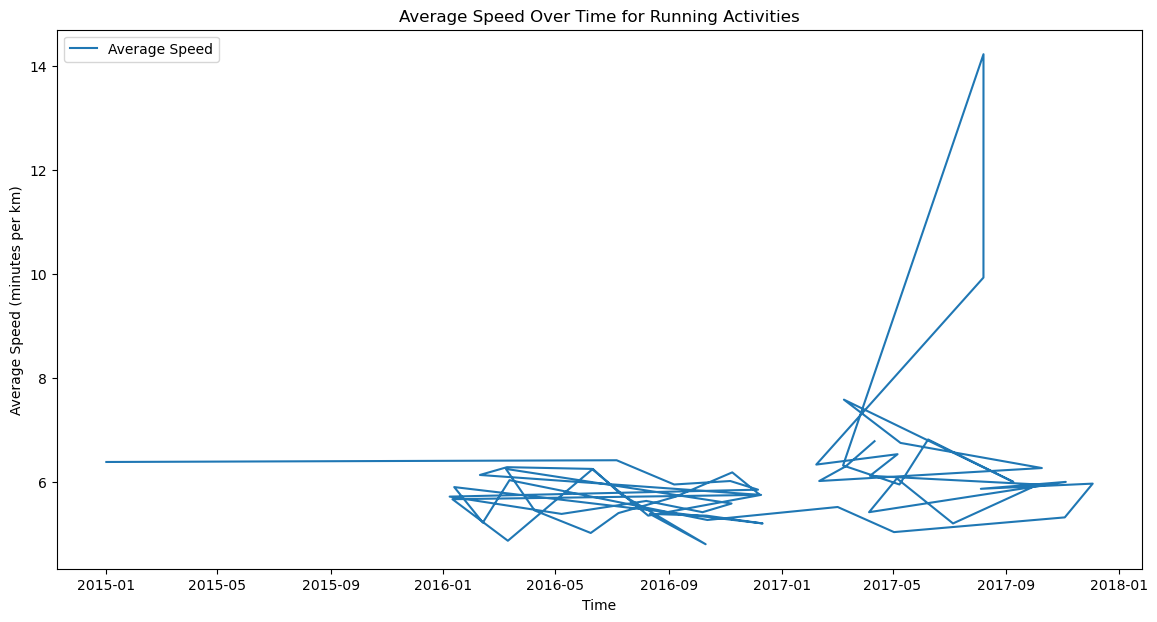

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
cleaned_df = pd.read_csv(r"C:\Users\likhi\Downloads\activities_cleaned.csv")

# Step 2: Filter the dataset for Running activities
running_df = cleaned_df[cleaned_df['Activity Type'] == 'Running']

# Step 3: Convert 'Begin Timestamp' to datetime
running_df['Begin Timestamp'] = pd.to_datetime(running_df['Begin Timestamp'], errors='coerce')

# Step 4: Handle missing timestamps by dropping rows with NaT in 'Begin Timestamp'
running_df = running_df.dropna(subset=['Begin Timestamp'])

# Step 5: Convert 'Average Speed' from time duration to numeric format
def time_to_minutes(time_str):
    try:
        mins, secs = map(int, time_str.split(':'))
        return mins + secs / 60
    except:
        return None

running_df['Average Speed'] = running_df['Average Speed'].apply(time_to_minutes)

# Step 6: Ensure all relevant columns are numeric
numeric_columns = ['Average Heart Rate (bpm)', 'Max. Heart Rate (bpm).1', 
                    'Average Speed', 'Max. Speed', 'Elevation Gain (Raw)', 
                    'Elevation Loss (Raw)', 'Distance (Raw)', 'Calories']

# Convert columns to numeric, setting errors='coerce' to handle non-numeric values
for col in numeric_columns:
    running_df[col] = pd.to_numeric(running_df[col], errors='coerce')

# Step 7: Check for missing values in key columns
print("Missing values in key columns:\n", running_df[numeric_columns].isnull().sum())

# Step 8: Plotting Average Heart Rate over time (Time-Series Analysis)
if not running_df.empty and running_df['Begin Timestamp'].notnull().all():
    plt.figure(figsize=(14, 7))
    plt.plot(running_df['Begin Timestamp'], running_df['Average Heart Rate (bpm)'], label='Average Heart Rate (bpm)')
    plt.title('Average Heart Rate Over Time for Running Activities')
    plt.xlabel('Time')
    plt.ylabel('Average Heart Rate (bpm)')
    plt.legend()
    plt.show()
else:
    print("No data available for plotting Average Heart Rate.")

# Plotting Average Speed over time
if not running_df.empty and running_df['Begin Timestamp'].notnull().all():
    plt.figure(figsize=(14, 7))
    plt.plot(running_df['Begin Timestamp'], running_df['Average Speed'], label='Average Speed')
    plt.title('Average Speed Over Time for Running Activities')
    plt.xlabel('Time')
    plt.ylabel('Average Speed (minutes per km)')
    plt.legend()
    plt.show()
else:
    print("No data available for plotting Average Speed.")
